# Integrated AI Cardiac Monitoring System - Data Analysis



## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

## 2. Load Dataset

In [2]:
df = pd.read_csv('CardiacPatientData.csv')
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (5906, 20)


,ID,SBP,DBP,HR,RR,BT,SpO2,Age,Gender,GCS,Na,K,Cl,Urea,Ceratinine,Alcoholic,Smoke,FHCD,TriageScore,Outcome
0,1,163,95,90,18,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
1,1,134,85,85,15,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
2,1,121,77,80,19,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
3,1,103,78,70,16,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
4,1,96,70,59,13,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1


## 3. Data Cleaning

### 3.1 Handling Missing Values
As observed in the initial exploration, several columns have significant missing values (Na, K, Cl, Urea, Creatinine, etc.). I handle these by:
1. Dropping columns with too many missing values if they aren't critical.
2. Imputing values for others using the median (robust to outliers).

In [ ]:
missing_data = df.isnull().sum()
print("Missing values per column:")
print(missing_data[missing_data > 0])

cols_to_impute = ['Na', 'K', 'Cl', 'Urea', 'Ceratinine', 'Alcoholic', 'Smoke', 'FHCD', 'TriageScore']
for col in cols_to_impute:
    df[col] = df[col].fillna(df[col].median())

print("\nMissing values after imputation:")
print(df.isnull().sum().sum())

Missing values per column:
Na             3244
K              3244
Cl             3248
Urea           3320
Ceratinine     3261
Alcoholic      1751
Smoke          1752
FHCD           1621
TriageScore    1903
dtype: int64

Missing values after imputation:
0


### 3.2 Feature Engineering & Selection
I dropped the `ID` column as it's just an identifier and doesn't contribute to the prediction.

In [4]:
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)
df.head()

,SBP,DBP,HR,RR,BT,SpO2,Age,Gender,GCS,Na,K,Cl,Urea,Ceratinine,Alcoholic,Smoke,FHCD,TriageScore,Outcome
0,163,95,90,18,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
1,134,85,85,15,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
2,121,77,80,19,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
3,103,78,70,16,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
4,96,70,59,13,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1


## 4. Exploratory Data Analysis (EDA)

### 4.1 Target Variable Distribution

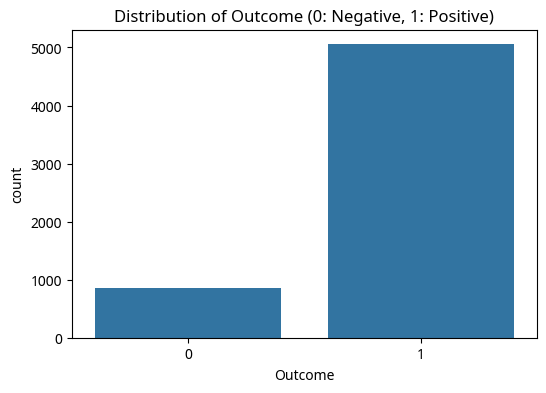

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome (0: Negative, 1: Positive)')
plt.show()

### 4.2 Correlation Heatmap

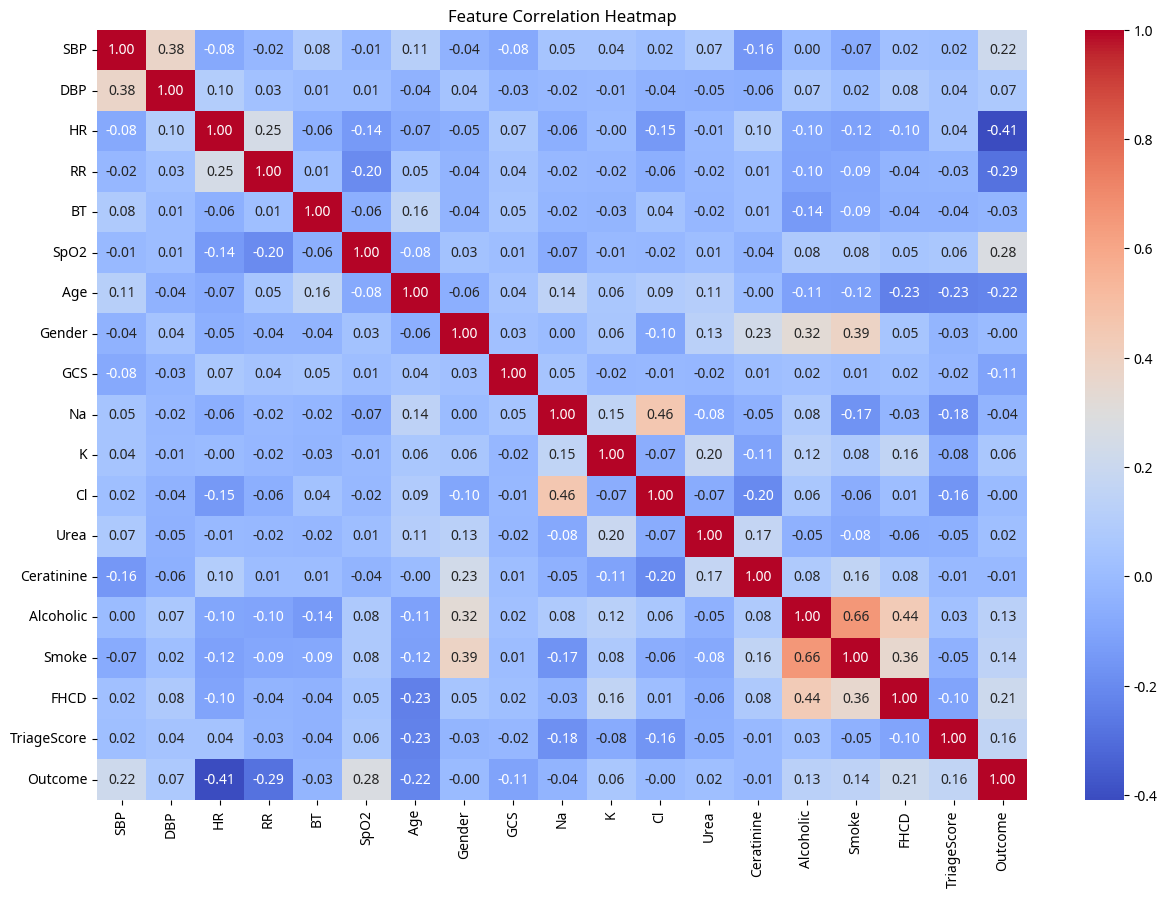

In [6]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

## 5. Machine Learning Model

### 5.1 Data Splitting

In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (4724, 18)
Testing set size: (1182, 18)


### 5.2 Feature Scaling

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5.3 Model Training (Random Forest)
I use  Random Forest as it handles non-linear relationships well and provides feature importance.

In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

### 5.4 Model Evaluation

In [10]:
y_pred = rf_model.predict(X_test_scaled)
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy Score: 0.9949238578680203

Confusion Matrix:
[[ 167    4]
 [   2 1009]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       171
           1       1.00      1.00      1.00      1011

    accuracy                           0.99      1182
   macro avg       0.99      0.99      0.99      1182
weighted avg       0.99      0.99      0.99      1182

ROC AUC Score: 0.9998206859053337


### 5.5 Feature Importance

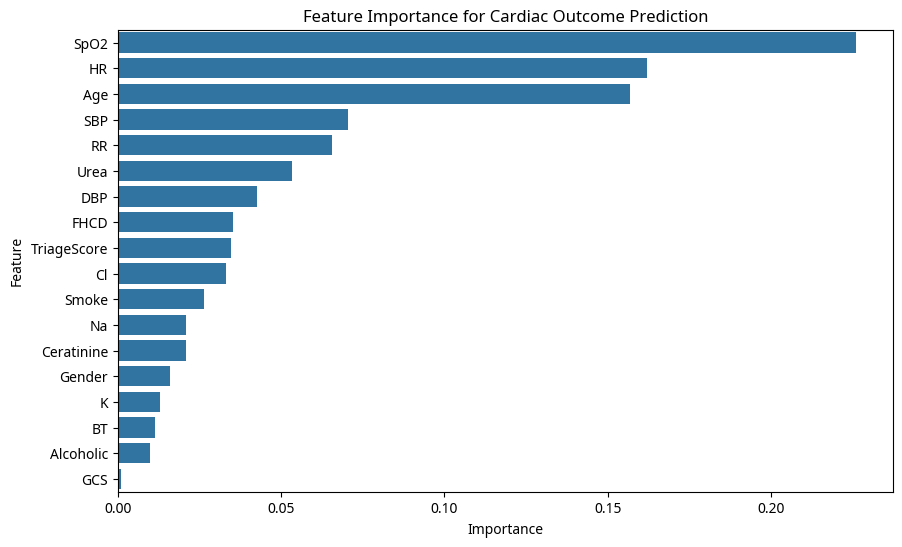

In [11]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Cardiac Outcome Prediction')
plt.show()

## 6. Conclusion
The model successfully predicts cardiac outcomes based on the provided features. Key vital signs like Heart Rate, Blood Pressure, and SpO2 play a significant role, which aligns with the sensors proposed in the Integrated AI Cardiac Monitoring System.